In [4]:
import pandas as pd
import numpy as np
%display typeset

In [2]:
all_data = pd.read_csv(r'C:\Users\VictorVilanova\Downloads\owid-covid-data.csv',index_col = "date")
only_pt = all_data["location"] == "Portugal"
df = all_data[only_pt]
df.tail()

iso_code continent  location  total_cases  new_cases  \
date                                                              
2020-09-03      PRT    Europe  Portugal      58633.0      390.0   
2020-09-04      PRT    Europe  Portugal      59051.0      418.0   
2020-09-05      PRT    Europe  Portugal      59457.0      406.0   
2020-09-06      PRT    Europe  Portugal      59943.0      486.0   
2020-09-07      PRT    Europe  Portugal      60258.0      315.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-09-03             337.000        1827.0         3.0                2.857   
2020-09-04             339.714        1829.0         2.0                2.857   
2020-09-05             340.429        1833.0         4.0                2.571   
2020-09-06             356.429        1838.0         5.0                2.857   
2020-09-07             355.714        1840.0         2.0                3.000   

            total_cases_per_million  ...  aged_70_older  gdp_per_capita  \
date                                 ...                                  
2020-09-03                 5750.190  ...         14.924       27936.896   
2020-09-04                 5791.183  ...         14.924       27936.896   
2020-09-05                 5831.000  ...         14.924       27936.896   
2020-09-06                 5878.663  ...         14.924       27936.896   
2020-09-07                 5909.555  ...         14.924       27936.896   

            extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
date                                                                      
2020-09-03              0.5                127.842                 9.85   
2020-09-04              0.5                127.842                 9.85   
2020-09-05              0.5                127.842                 9.85   
2020-09-06              0.5                127.842                 9.85   
2020-09-07              0.5                127.842                 9.85   

            female_smokers  male_smokers  handwashing_facilities  \
date                                                               
2020-09-03            16.3          30.0                     NaN   
2020-09-04            16.3          30.0                     NaN   
2020-09-05            16.3          30.0                     NaN   
2020-09-06            16.3          30.0                     NaN   
2020-09-07            16.3          30.0                     NaN   

            hospital_beds_per_thousand  life_expectancy  
date                                                     
2020-09-03                        3.39            82.05  
2020-09-04                        3.39            82.05  
2020-09-05                        3.39            82.05  
2020-09-06                        3.39            82.05  
2020-09-07                        3.39            82.05  

[5 rows x 39 columns]

# Plotando a curva de casos totais acumulados

In [3]:
fig = df["total_cases"].plot(figsize = (10,10))
fig

# Plotando a curva de casos diários

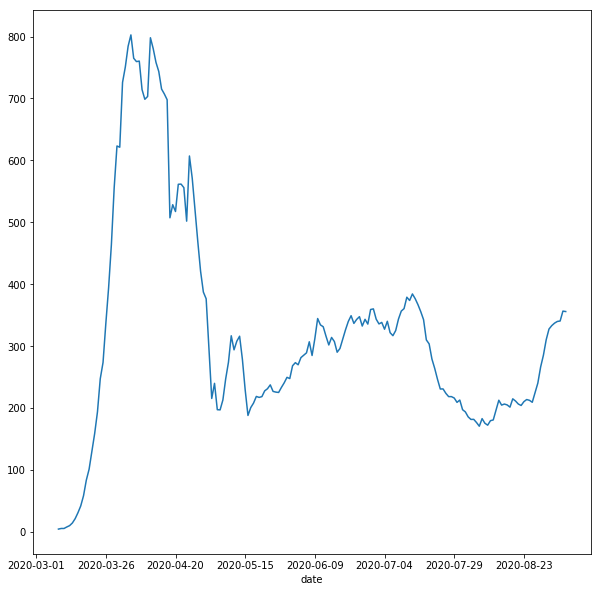

In [4]:
fig2 = df["new_cases_smoothed"].plot(figsize=(10,10))
fig2

In [5]:
#legenda:
# 1/ro -> periodo de incubação
# 1/lambd -> tempo entre o sintoma e a hospitalização
# 1/k -> é o tempo do periodo infectuoso/recovery
# 1/delta -> é o tempo da hospitalização/morte
# gama -> taxa ded surto clínico
# l -> taxa de medidas de proteção pessoal da população
# d -> taxa de medidas de contenção tomadas pelo governo
# estamos usando que 13% dos casos precisam ser hospitalizados
# unidade de tempo é 1 dia.

def model(t,y,params):
    S, Q, E, I, M = y
    ro, beta, gama, alfa, chi, N = params
    return [
        -beta*(1-chi)*S*I + ro*I, #dS/dt
        chi*S, #dS/dt
        beta*(1-chi)*S*I-(alfa)*E, #dE/dt
        alfa*E-ro*I-gama*I, #dI/dt
        gama*I #dM/dt
    ]

In [6]:
model(0,[50,0,20,10,0],[1,2,3,4,5,6])

[4010, 250, -4080, 40, 30]

In [7]:
ro = 0.2190519831830368
beta = 0.27272459855759813
gama = 0.07
chi = 0.03
alfa=0.08
N = 10

In [8]:
T = ode_solver()
T.function = model
T.algorithm = "rk8pd"
inits = [.99,0,0,1e-4,0]
tspan = [0,200]
T.ode_solve(tspan, inits, num_points=200, params = [ro, beta, gama, alfa, chi, N])

In [9]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[9.90000000e-01, 0.00000000e+00, 0.00000000e+00, 1.00000000e-04,
        0.00000000e+00],
       [9.89996266e-01, 2.96999414e-02, 2.18925682e-05, 7.57410909e-05,
        6.09992977e-06],
       [9.89993405e-01, 5.93997847e-02, 3.69890401e-05, 5.88311664e-05,
        1.07744792e-05],
       ...,
       [9.89887674e-01, 5.88018029e+00, 2.24122580e-05, 6.33423228e-06,
        1.83579460e-04],
       [9.89887404e-01, 5.90987692e+00, 2.22784094e-05, 6.29640387e-06,
        1.84021530e-04],
       [9.89887135e-01, 5.93957354e+00, 2.21453598e-05, 6.25880128e-06,
        1.84460961e-04]])

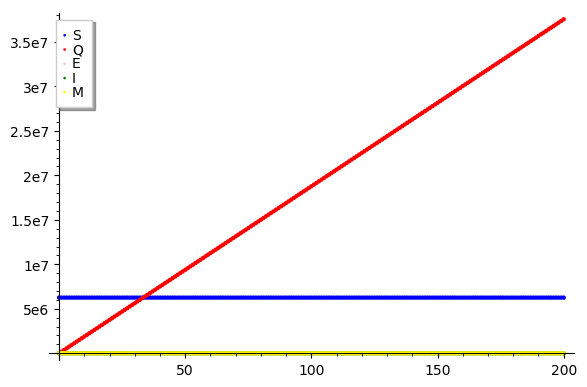

In [10]:
popRJ = 6.32e6
def plot_sol(sol):
    sim = get_sim_array(sol)*popRJ
    P = list_plot(sim[:,0],legend_label='S')
    colors = ['blue','red','pink','green','yellow','orange','black','purple']
    for i,var in enumerate(['Q', 'E', 'I', 'M']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P)
plot_sol(T.solution)

In [7]:
@interact(ro=(0,1,0.01),
beta =(0,1,0.01),
gama =(0,1,0.01),
chi =(0,1,0.01),
alfa=(0,1,0.01),
teta=(0,1,0.01),
delta=(0,1,0.01),
N=(10,150))
def plot_solution(ro=0.17,
beta =0.62,
gama =0.08,
chi =0.15,
alfa=0.33,
teta=0.13,
delta=0.51,
N=20):
    def model(t,y,params):
        S, E, I, M, R = y
        ro, beta, gama, alfa, chi, N = params
        return [
            -beta*(1-chi)*S*I, #ro*I,# ( reinfecção) dS/dt
            #chi*S, #dQ/dt Quarentenados acumulados
            beta*(1-chi)*S*I-(alfa)*E, #-(teta)*E, #dE/dt
            alfa*E-gama*I, # - ro*I (reinfecção)dI/dt
            gama*I, #dM/dt Mortes acumuladas
            ro*I # dR/dt Recuperados acumulados
        ]
    T = ode_solver()
    T.function = model
    T.algorithm = "rk8pd"
    inits = [.99,0,1e-4,0,0]
    tspan = [0,200]
    T.ode_solve(tspan, inits, num_points=200, params = [ro, beta, gama, alfa, chi, N])
    def get_sim_array(sol):
        sim = np.array([y for t,y in sol])
        return sim
    popPT = 6.32e6
    def plot_sol(sol):
        sim = get_sim_array(sol)*popPT
        P = list_plot(sim[:,0],legend_label='S')
        colors = ['blue','red','green','black','orange']
        for i,var in enumerate(['E', 'I', 'M','R']):
            P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
        show(P)
    plot_sol(T.solution)

Interactive function <function plot_solution at 0x6fd474a8f28> with 8 widgets
  ro: FloatSlider(value=0.17, de…